In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

x = np.array(df['RM'])
y = np.array(df['target'])

scaler = MinMaxScaler()
scale_x = scaler.fit_transform(x.reshape(-1, 1))


c:\Users\AY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

In [386]:
def least_squares_fit(x, y):
    w = np.corrcoef(x, y) * np.std(y) / np.std(x)
    b = np.mean(y) - w * np.mean(x)
    return w, b

In [387]:
def predict(x, w, b)-> float:
    return x * w + b

In [388]:
def MSE(x, w, b, y)-> float:
    error = (y - predict(x, w, b))**2 / len(y)
    return error

In [389]:
def cost_function(x, w, b, y)-> float:
    error = MSE(x, w, b, y)
    return 1 / 2 * error

In [528]:
# gradient desent
num_epoch = 100
errors = []

# 학습률
learning_rate = 0.01

# 초기 w,b 랜덤 설정
w = np.random.uniform(low=9.0, high=10.0)
b = np.random.uniform(low=-40.0, high=-10.0)

for epoch in range(num_epoch):
    y_predict = predict(x, w, b)
    error = np.mean(((y_predict - y)**2))
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_predict - y) * x).mean()
    b = b - learning_rate * (y_predict - y).mean() 

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 7.76495, b = -13.80511 error = 482.17422
 5 w = 6.00657, b = -14.09420 error = 51.03097
10 w = 5.88242, b = -14.12638 error = 48.81261
15 w = 5.87533, b = -14.14015 error = 48.79501
20 w = 5.87662, b = -14.15259 error = 48.78871
25 w = 5.87851, b = -14.16493 error = 48.78247
30 w = 5.88045, b = -14.17725 error = 48.77625
35 w = 5.88238, b = -14.18957 error = 48.77003
40 w = 5.88432, b = -14.20188 error = 48.76381
45 w = 5.88625, b = -14.21418 error = 48.75761
50 w = 5.88819, b = -14.22648 error = 48.75141
55 w = 5.89012, b = -14.23876 error = 48.74522
60 w = 5.89205, b = -14.25104 error = 48.73904
65 w = 5.89398, b = -14.26332 error = 48.73286
70 w = 5.89591, b = -14.27558 error = 48.72670
75 w = 5.89783, b = -14.28784 error = 48.72054
80 w = 5.89976, b = -14.30009 error = 48.71438
85 w = 5.90168, b = -14.31234 error = 48.70824
90 w = 5.90361, b = -14.32457 error = 48.70210
95 w = 5.90553, b = -14.33680 error = 48.69597
-----------------------------------------------------------

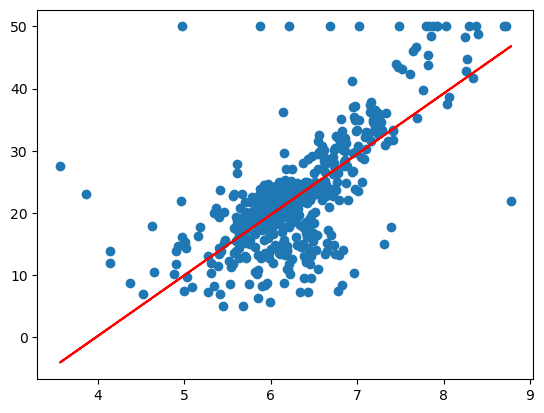

In [427]:
plt.scatter(x, y)
plt.plot(x, predict(x, w, b), color='red')

# Logistic Regression

In [9]:
def log_odds(features, coefficients, intercept):
  z = np.dot(features, coefficients) + intercept
  return z

In [10]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [11]:
def log_loss(y_pred, y_true):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  log_loss = -1 * np.mean( y_true*np.log10(y_pred) \
                          + (1-y_true)*np.log10(1-y_pred)) 
  return log_loss

In [12]:
def gradient_db(x, y, w, b):
  db = y-sigmoid(np.dot(w.T,x)+b)
  return db

In [13]:
def gradient_dw(x, y, w, b, alpha, N):
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)
  return dw

In [14]:
def predict_class(features, coefficients, intercept, threshold):
  z = log_odds(features, coefficients, intercept)
  a = sigmoid(z)

  return np.where(a >= threshold, 1, 0)

In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# 데이터 생성
X, y = make_classification(n_samples = 50000, n_features = 15, 
                    n_informative = 10, n_redundant = 5, 
                    n_classes = 2, weights = [0.7], 
                    class_sep = 0.7, random_state=15)

# 데이터 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state = 15)

# 데이터 정규화 
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

# w, b 초기화
w = np.zeros_like(X_train[0])
b = 0

# 학습률, 반복 설정
alpha  = 0.0001
eta0   = 0.0001
epochs = 50

N = len(X_train)
log_loss_train = []
log_loss_test = []

for i in range(0, epochs):
    for j in range(N):
        grad_dw = gradient_dw(x_train_standard[j], y_train[j], w, b, alpha, N)
        grad_db = gradient_db(x_train_standard[j], y_train[j], w, b)
        w = np.array(w) + (eta0 * np.array(grad_dw))
        b = b + (eta0 * grad_db)

    predict_train = []
    for m in range(len(y_train)):
        z = np.dot(w, x_train_standard[m])+b
        predict_train.append(sigmoid(z)) 
    
    train_loss = log_loss(y_train, predict_train)

    predict_test = []
    for m in range(len(y_test)):
        z = np.dot(w, x_test_standard[m])+b
        predict_test.append(sigmoid(z))
    
    test_loss = log_loss(y_test, predict_test)


    if log_loss_train and train_loss > log_loss_train[-1]: 
        break
    
    log_loss_train.append(train_loss)
    log_loss_test.append(test_loss)

C:\Users\AY\AppData\Local\Temp\ipykernel_19524\3395817780.py:4: RuntimeWarning: divide by zero encountered in log10
  log_loss = -1 * np.mean( y_true*np.log10(y_pred) \
C:\Users\AY\AppData\Local\Temp\ipykernel_19524\3395817780.py:5: RuntimeWarning: divide by zero encountered in log10
  + (1-y_true)*np.log10(1-y_pred))


In [16]:
print ("weight vector: ", w)
print ("Intercept: ", b)

weight vector:  [-0.97125471  0.6951594  -0.1064887   0.68159065 -0.4447256   1.00799626
 -0.94341151 -0.07316669  0.44633501  0.47814799  0.27402291  0.06013621
 -0.09610527  0.57042941  0.06404642]
Intercept:  -1.3691399553813899


In [17]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(eta0 = 0.0001, loss='log', alpha=0.0001, 
              random_state=15, penalty='l2', tol=1e-3, 
              verbose=2, learning_rate='constant')
clf.fit(x_train_standard, y_train)
clf.coef_, clf.intercept_ 

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 array([-1.30580538]))

# L1 regularization

# Logistic Regression

In [314]:
def log_odds(features, coefficients, intercept):
  z = np.dot(features, coefficietns) + intercept
  return z

In [315]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [341]:
def log_loss(y_pred, y_true):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  log_loss = -1 * np.mean( y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred)) 
  return log_loss

In [342]:
def gradient_db(x, y, w, b):
  db = y-sigmoid(np.dot(w.T,x)+b)
  return db

In [343]:
def gradient_dw(x, y, w, b, alpha, N):
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)
  return dw

In [344]:
def predict_class(features, coefficients, intercept, threshold):
  z = log_odds(features, coefficients, intercept)
  a = sigmoid(z)

  return np.where(a >= threshold, 1, 0)

In [351]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 생성
X, y = make_classification(n_samples = 50000, n_features = 15, 
                    n_informative = 10, n_redundant = 5, 
                    n_classes = 2, weights = [0.7], 
                    class_sep = 0.7, random_state=15)

# 데이터 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state = 15)

# 데이터 정규화 
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

# w, b 초기화
w = np.zeros_like(X_train[0])
b = 0

# 학습률, 반복 설정
alpha  = 0.0001
eta0   = 0.0001
epochs = 50

N = len(X_train)
log_loss_train = []
log_loss_test = []

for i in range(0, epochs):
    for j in range(N):
        grad_dw = gradient_dw(x_train_standard[j], y_train[j], w, b, alpha, N)
        grad_db = gradient_db(x_train_standard[j], y_train[j], w, b)
        w = np.array(w) + (eta0 * np.array(grad_dw))
        b = b + (eta0 * grad_db)

    predict_train = []
    for m in range(len(y_train)):
        z = np.dot(w, x_train_standard[m])+b
        predict_train.append(sigmoid(z)) 
    
    train_loss = log_loss(y_train, predict_train)

    predict_test = []
    for m in range(len(y_test)):
        z = np.dot(w, x_test_standard[m])+b
        predict_test.append(sigmoid(z))
    
    test_loss = log_loss(y_test, predict_test)


    if log_loss_train and train_loss > log_loss_train[-1]: 
        break
    
    log_loss_train.append(train_loss)
    log_loss_test.append(test_loss)

C:\Users\AY\AppData\Local\Temp\ipykernel_17504\3679002326.py:4: RuntimeWarning: divide by zero encountered in log10
  log_loss = -1 * np.mean( y_true*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred))


In [352]:
print ("weight vector: ", w)
print ("Intercept: ", b)

weight vector:  [-0.97125471  0.6951594  -0.1064887   0.68159065 -0.4447256   1.00799626
 -0.94341151 -0.07316669  0.44633501  0.47814799  0.27402291  0.06013621
 -0.09610527  0.57042941  0.06404642]
Intercept:  -1.3691399553813899


In [353]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(eta0 = 0.0001, loss='log', alpha=0.0001, 
              random_state=15, penalty='l2', tol=1e-3, 
              verbose=2, learning_rate='constant')
clf.fit(x_train_standard, y_train)
clf.coef_, clf.intercept_ 

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.03 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.03 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 array([-1.30580538]))

# L1 regularization

In [523]:
# gradient desent
num_epoch = 100
errors = []

# 학습률
learning_rate = 0.01
lr = 0.001

# 초기 w,b 랜덤 설정
w = np.random.uniform(low=9.0, high=10.0)
b = np.random.uniform(low=-40.0, high=-10.0)

for epoch in range(num_epoch):
    y_predict = predict(x, w, b)
    error = np.mean(((y_predict - y)**2))
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_predict - y) * x).mean()+ lr * np.sum(np.abs(w))
    b = b - learning_rate * (y_predict - y).mean() 

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))


 0 w = 8.12869, b = -17.01974 error = 415.96292
 5 w = 6.51433, b = -17.28987 error = 49.49931
10 w = 6.39998, b = -17.32360 error = 47.34708
15 w = 6.39396, b = -17.34026 error = 47.31243
20 w = 6.39576, b = -17.35567 error = 47.30453
25 w = 6.39813, b = -17.37099 error = 47.29791
30 w = 6.40054, b = -17.38629 error = 47.29139
35 w = 6.40295, b = -17.40159 error = 47.28488
40 w = 6.40536, b = -17.41687 error = 47.27839
45 w = 6.40777, b = -17.43215 error = 47.27190
50 w = 6.41018, b = -17.44743 error = 47.26542
55 w = 6.41258, b = -17.46269 error = 47.25895
60 w = 6.41499, b = -17.47795 error = 47.25249
65 w = 6.41739, b = -17.49320 error = 47.24604
70 w = 6.41979, b = -17.50845 error = 47.23959
75 w = 6.42219, b = -17.52368 error = 47.23316
80 w = 6.42459, b = -17.53891 error = 47.22673
85 w = 6.42699, b = -17.55414 error = 47.22032
90 w = 6.42939, b = -17.56935 error = 47.21391
95 w = 6.43179, b = -17.58456 error = 47.20751
-----------------------------------------------------------

# L2 regularization

In [495]:
# gradient desent
num_epoch = 100
errors = []

# 학습률
learning_rate = 0.01
lr = 0.001

# 초기 w,b 랜덤 설정
w = np.random.uniform(low=9.0, high=10.0)
b = np.random.uniform(low=-40.0, high=-10.0)

for epoch in range(num_epoch):
    y_predict = predict(x, w, b)
    error = np.mean(((y_predict - y)**2))
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_predict - y) * x).mean()+ lr * np.sum(np.square(w))
    b = b - learning_rate * (y_predict - y).mean() 

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))


 0 w = 9.60701, b = -34.18808 error = 70.48987
 5 w = 9.28504, b = -34.30865 error = 46.29967
10 w = 9.26814, b = -34.37909 error = 45.42297
15 w = 9.27669, b = -34.44545 error = 45.36489
20 w = 9.28738, b = -34.51158 error = 45.36742
25 w = 9.29826, b = -34.57779 error = 45.37509
30 w = 9.30919, b = -34.64412 error = 45.38334
35 w = 9.32013, b = -34.71056 error = 45.39177
40 w = 9.33109, b = -34.77711 error = 45.40036
45 w = 9.34207, b = -34.84379 error = 45.40910
50 w = 9.35307, b = -34.91058 error = 45.41800
55 w = 9.36409, b = -34.97749 error = 45.42706
60 w = 9.37513, b = -35.04452 error = 45.43627
65 w = 9.38619, b = -35.11166 error = 45.44565
70 w = 9.39728, b = -35.17893 error = 45.45518
75 w = 9.40838, b = -35.24631 error = 45.46487
80 w = 9.41950, b = -35.31381 error = 45.47473
85 w = 9.43064, b = -35.38144 error = 45.48474
90 w = 9.44181, b = -35.44918 error = 45.49492
95 w = 9.45299, b = -35.51704 error = 45.50526
------------------------------------------------------------

# Early Stopping

In [ ]:
best_loss = 10 ** 9 # 매우 큰 값으로 초기값 가정
limit = 3 # 몇 번의 epoch까지 지켜볼지를 결정
check = 0 # 현재 몇 epoch 연속으로 loss 개선이 안되는지를 기록

### 전체 학습 코드 스니펫 ###
for i in range(epochs):
	
    ### 각 epoch의 train 부분 ###
    model.train()

    for X, y in train_dataloader:
        y_pred = model(X)
        loss = loss_function(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    ### 각 epoch train 이후 evaluation 진행 ###
    model.eval()
    val_loss = 0

    for X, y in eval_dataloader:
        
        y_pred = model(X)
        loss = loss_function(y_pred, y)

        val_loss += loss.item()   
        
    ### early stopping 여부를 체크하는 부분 ###
    if val_loss > best_loss: # loss가 개선되지 않은 경우
        patience_check += 1

        if patience_check >= patience_limit: # early stopping 조건 만족 시 조기 종료
            break

    else: # loss가 개선된 경우
        best_loss = val_loss
        patience_check = 0

In [534]:
# gradient desent
num_epoch = 10000
errors = []

# limit epoch 설정
limit = 100
# 현재 몇 epoch 연속으로 loss 개선이 안되는지를 기록
check = 0 
best_loss = 9999

# 학습률
learning_rate = 0.01

# 초기 w,b 랜덤 설정
w = np.random.uniform(low=9.0, high=10.0)
b = np.random.uniform(low=-40.0, high=-10.0)

for epoch in range(num_epoch):
    y_predict = predict(x, w, b)
    error = np.mean(((y_predict - y)**2))
    
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_predict - y) * x).mean()+ lr * np.sum(np.square(w))
    b = b - learning_rate * (y_predict - y).mean() 

    errors.append(error)
    
    # EARLY STOPPING
    if best_loss < error:
        check += 1
        if check >= limit:
            break
    else:
        best_loss = error
        check = 0

    
    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 8.84315, b = -28.51546 error = 88.80058
 5 w = 8.36923, b = -28.65137 error = 46.38757
10 w = 8.33880, b = -28.71463 error = 45.26418
15 w = 8.34486, b = -28.77199 error = 45.18496
20 w = 8.35392, b = -28.82896 error = 45.17575
25 w = 8.36324, b = -28.88596 error = 45.17227
30 w = 8.37259, b = -28.94305 error = 45.16935
35 w = 8.38196, b = -29.00023 error = 45.16656
40 w = 8.39135, b = -29.05749 error = 45.16387
45 w = 8.40075, b = -29.11484 error = 45.16128
50 w = 8.41016, b = -29.17227 error = 45.15878
55 w = 8.41959, b = -29.22979 error = 45.15638
60 w = 8.42903, b = -29.28740 error = 45.15407
65 w = 8.43849, b = -29.34509 error = 45.15186
70 w = 8.44797, b = -29.40288 error = 45.14975
75 w = 8.45746, b = -29.46075 error = 45.14774
80 w = 8.46696, b = -29.51871 error = 45.14582
85 w = 8.47648, b = -29.57675 error = 45.14400
90 w = 8.48601, b = -29.63489 error = 45.14229
95 w = 8.49556, b = -29.69311 error = 45.14067
100 w = 8.50512, b = -29.75143 error = 45.13915
105 w = 8.51

# dropout

In [542]:
def dropout(X, drop_prob):
    assert 0 <= drop_prob <= 1
    
    if drop_prob == 1:
        return np.zeros_like(X)
    mask = np.random.uniform(0, 1, X.shape) > drop_prob
    return mask * X / (1.0-drop_prob)

In [544]:
X = np.arange(16).reshape((2, 8))
print(dropout(X, 0))
print(dropout(X, 0.3))
print(dropout(X, 0.5))
print(dropout(X, 1))

[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]]
[[ 0.          1.42857143  0.          0.          5.71428571  7.14285714
   8.57142857 10.        ]
 [ 0.          0.         14.28571429  0.         17.14285714  0.
  20.          0.        ]]
[[ 0.  0.  4.  0.  0.  0.  0. 14.]
 [16. 18. 20.  0. 24.  0.  0. 30.]]
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
